In [7]:
# ETAPA 1 - EDA (Análise Exploratória de Dados)

# 1) Imports
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2) Verificação rápida do kernel/venv
print("Python exe:", sys.executable)         # deve terminar com ...\venv\Scripts\python.exe
print("Pandas:", pd.__version__)

# 3) Configs visuais
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="dark")

# 4) Carregar dataset (notebook está em notebooks/, então usamos ../)
df = pd.read_csv("../data/datasets/students_performance.csv")

# 5) Conferir primeiras linhas
df.head()


Python exe: c:\Users\Lucas\uninassau-atividade-alunos-ml-regressao\notebooks\.venv\Scripts\python.exe
Pandas: 2.3.3


,student_id,age,gender,parental_education,study_hours_week,attendance_rate,extracurricular,sleep_hours,previous_scores,tutoring,internet_quality,family_income,health_status,final_grade
0,STD01416,22,M,bachelor,5.66,69.55,Yes,6.49,49.41,No,Good,Medium,Good,85.39
1,STD01345,19,M,bachelor,13.30,58.82,Yes,8.12,50.29,No,NaN,Medium,Good,98.43
2,STD01705,25,M,master,10.43,59.72,Yes,6.60,71.64,No,Good,Medium,Good,100.00
3,STD00299,21,F,bachelor,3.90,68.33,Yes,6.99,50.93,Yes,Poor,Low,Excellent,86.85
4,STD01762,19,F,bachelor,4.24,50.44,Yes,8.06,54.00,No,Poor,Medium,Excellent,83.25


In [8]:
import sys, subprocess

print("Instalando bibliotecas no Python:", sys.executable)
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "seaborn", "matplotlib"])


Instalando bibliotecas no Python: c:\Users\Lucas\uninassau-atividade-alunos-ml-regressao\notebooks\.venv\Scripts\python.exe


0

In [9]:
# VISÃO GERAL DO DATASET

# Informações gerais
print("Dimensões do dataset (linhas, colunas):", df.shape)
print("\nTipos de dados por coluna:")
print(df.dtypes)

# Estatísticas descritivas (somente numéricas)
print("\nResumo estatístico das variáveis numéricas:")
display(df.describe())

# Valores únicos por coluna (para detectar categóricas)
print("\nQuantidade de valores únicos por coluna:")
print(df.nunique())

# Verificar se há valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

Dimensões do dataset (linhas, colunas): (2510, 14)

Tipos de dados por coluna:
student_id             object
age                     int64
gender                 object
parental_education     object
study_hours_week      float64
attendance_rate       float64
extracurricular        object
sleep_hours           float64
previous_scores       float64
tutoring               object
internet_quality       object
family_income          object
health_status          object
final_grade           float64
dtype: object

Resumo estatístico das variáveis numéricas:


,age,study_hours_week,attendance_rate,sleep_hours,previous_scores,final_grade
count,2510.000000,2217.000000,2278.000000,2244.000000,2383.000000,2510.000000
mean,21.623904,10.603554,59.679789,6.996569,57.261028,92.090076
std,2.766664,8.635456,10.611523,1.336190,9.477943,7.446434
min,17.000000,-3.620000,20.820000,2.070000,21.200000,63.240000
25%,20.000000,6.510000,52.840000,6.130000,51.105000,86.982500
50%,22.000000,9.960000,59.905000,6.990000,57.300000,93.310000
75%,24.000000,13.400000,66.652500,7.830000,63.620000,99.850000
max,99.000000,113.200000,108.950000,15.950000,86.100000,101.070000



Quantidade de valores únicos por coluna:
student_id            2510
age                     12
gender                   7
parental_education      12
study_hours_week      1276
attendance_rate       1692
extracurricular          6
sleep_hours            553
previous_scores       1730
tutoring                 6
internet_quality         9
family_income            9
health_status            9
final_grade           1301
dtype: int64

Valores nulos por coluna:
student_id              0
age                     0
gender                  0
parental_education      0
study_hours_week      293
attendance_rate       232
extracurricular         0
sleep_hours           266
previous_scores       127
tutoring                0
internet_quality      155
family_income         278
health_status           0
final_grade             0
dtype: int64


,Valores Faltantes,Percentual (%)
study_hours_week,293,11.673307
family_income,278,11.075697
sleep_hours,266,10.597610
attendance_rate,232,9.243028
internet_quality,155,6.175299
previous_scores,127,5.059761


C:\Users\Lucas\AppData\Local\Temp\ipykernel_18240\3828434329.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y='Percentual (%)', data=missing_data, palette='rocket')


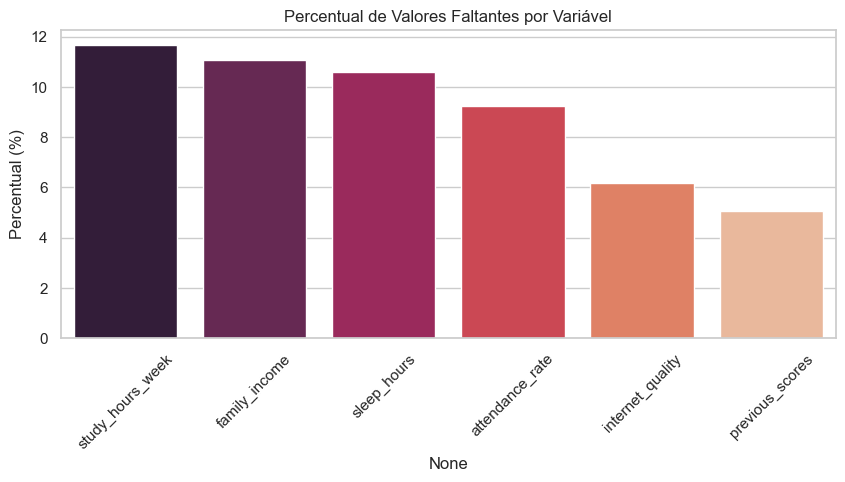

In [10]:
# ANÁLISE DE VALORES FALTANTES

import matplotlib.pyplot as plt
import seaborn as sns

# Quantidade e percentual de valores faltantes
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Criar um DataFrame com o resumo
missing_data = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Percentual (%)': missing_percent
})
missing_data = missing_data[missing_data['Valores Faltantes'] > 0].sort_values(by='Percentual (%)', ascending=False)

# Exibir a tabela
display(missing_data)

# Visualização dos valores faltantes
plt.figure(figsize=(10, 4))
sns.barplot(x=missing_data.index, y='Percentual (%)', data=missing_data, palette='rocket')
plt.title('Percentual de Valores Faltantes por Variável')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.show()


### 📉 Análise de Valores Faltantes

Nesta etapa, identificamos as variáveis que possuem valores ausentes no dataset.  
O gráfico acima mostra o percentual de *missing values* em cada coluna.

- As variáveis com mais dados faltantes devem receber atenção especial na etapa de **pré-processamento**.  
- É importante observar se há algum padrão (por exemplo, colunas relacionadas ao perfil socioeconômico podem ter mais lacunas).  
- Nenhum tratamento é feito nesta etapa — apenas **identificação e análise** dos dados ausentes.


Resumo estatístico da variável alvo (final_grade):



count    2510.000000
mean       92.090076
std         7.446434
min        63.240000
25%        86.982500
50%        93.310000
75%        99.850000
max       101.070000
Name: final_grade, dtype: float64


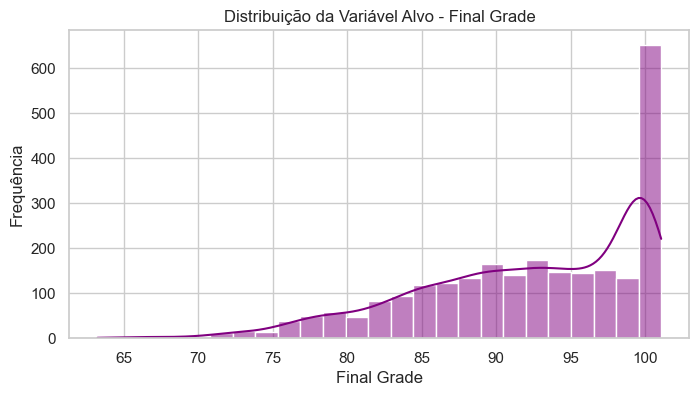

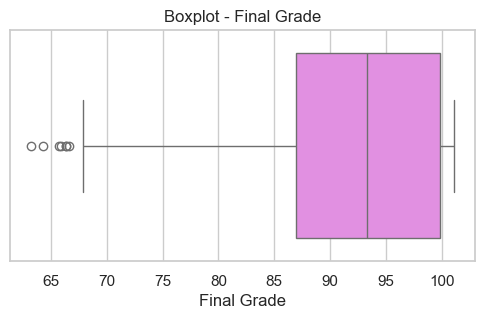


Teste de Normalidade (Shapiro-Wilk):
Estatística = 0.9029, p-valor = 0.0000
⚠️ A distribuição NÃO é normal (p ≤ 0.05)


In [11]:
# ANÁLISE DA VARIÁVEL ALVO: final_grade

import scipy.stats as stats

# Estatísticas descritivas
print("Resumo estatístico da variável alvo (final_grade):\n")
print(df["final_grade"].describe())

# Histograma
plt.figure(figsize=(8, 4))
sns.histplot(df["final_grade"], kde=True, bins=25, color="purple")
plt.title("Distribuição da Variável Alvo - Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Frequência")
plt.show()

# Boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["final_grade"], color="violet")
plt.title("Boxplot - Final Grade")
plt.xlabel("Final Grade")
plt.show()

# Teste de normalidade (Shapiro-Wilk)
stat, p_value = stats.shapiro(df["final_grade"])
print(f"\nTeste de Normalidade (Shapiro-Wilk):\nEstatística = {stat:.4f}, p-valor = {p_value:.4f}")

if p_value > 0.05:
    print("✅ A distribuição parece ser normal (p > 0.05)")
else:
    print("⚠️ A distribuição NÃO é normal (p ≤ 0.05)")


### 🎯 Análise da Variável Alvo — `final_grade`

A variável **`final_grade`** representa a nota final dos estudantes.  
Foram calculadas estatísticas descritivas, analisada sua distribuição e testada a normalidade com o **teste de Shapiro-Wilk**.

- O histograma mostra a forma geral da distribuição (tendência central, caudas e dispersão).  
- O boxplot indica possíveis **outliers** e a variação das notas.  
- O teste de normalidade verifica se a distribuição se aproxima de uma curva normal:
  - Se `p > 0.05` → distribuição aproximadamente normal  
  - Se `p ≤ 0.05` → distribuição não normal  

---

#### 📊 Interpretação dos resultados

A distribuição apresentada no histograma mostra que as notas estão **concentradas nas faixas mais altas (90 a 100)**, com uma **cauda à esquerda**, indicando **assimetria negativa** — ou seja, a maioria dos alunos obteve bom desempenho.

O boxplot confirma essa tendência:
- A **mediana** está próxima de **93**.  
- Há **poucos outliers** nas faixas mais baixas (entre 60 e 70).  
- O **intervalo interquartil é pequeno**, o que mostra baixa variação entre as notas mais altas.  

Essas observações sugerem que o desempenho geral dos alunos é **muito bom**, com **pouca dispersão** e uma **pequena parcela abaixo da média**.  
O teste de Shapiro-Wilk indica que a distribuição **não é normal** (assimétrica à esquerda), o que reforça que os valores se concentram nas notas mais altas.

---

📘 **Importância para as próximas etapas:**  
Essas informações serão úteis para decidir o tipo de modelo de regressão a ser usado na modelagem, já que a variável alvo apresenta uma **distribuição enviesada**, o que pode exigir **normalização ou transformação** dos dados em etapas futuras.


Variáveis numéricas analisadas: ['age', 'study_hours_week', 'attendance_rate', 'sleep_hours', 'previous_scores']

📊 Variável: age


count    2510.000000
mean       21.623904
std         2.766664
min        17.000000
25%        20.000000
50%        22.000000
75%        24.000000
max        99.000000
Name: age, dtype: float64

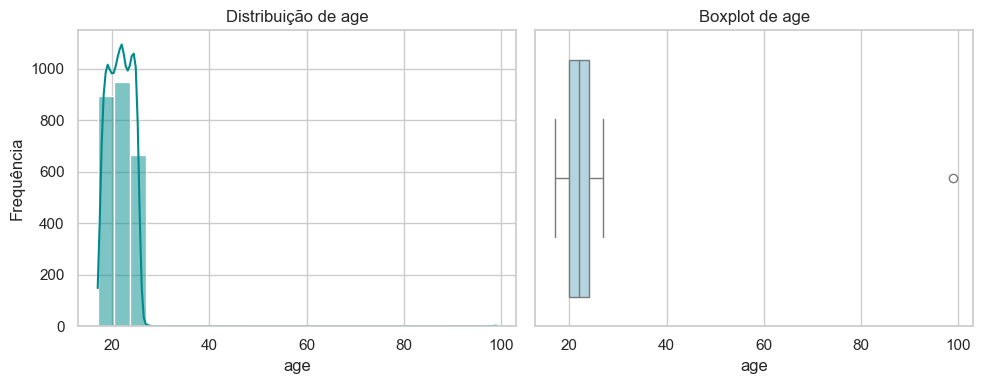


📊 Variável: study_hours_week


count    2217.000000
mean       10.603554
std         8.635456
min        -3.620000
25%         6.510000
50%         9.960000
75%        13.400000
max       113.200000
Name: study_hours_week, dtype: float64

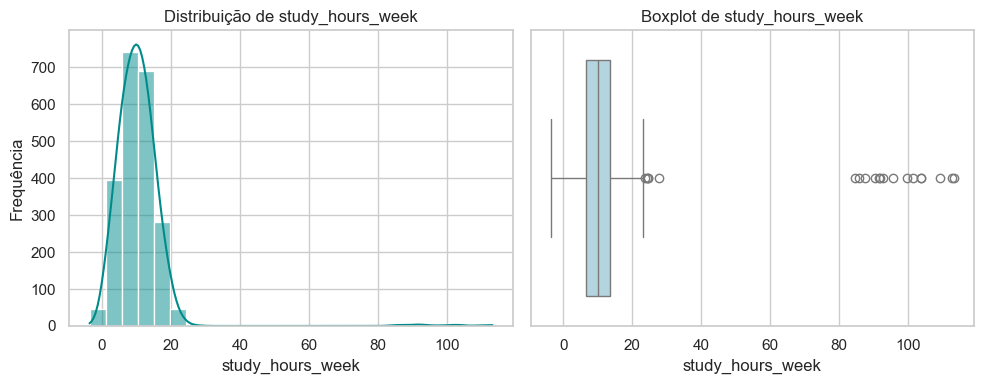


📊 Variável: attendance_rate


count    2278.000000
mean       59.679789
std        10.611523
min        20.820000
25%        52.840000
50%        59.905000
75%        66.652500
max       108.950000
Name: attendance_rate, dtype: float64

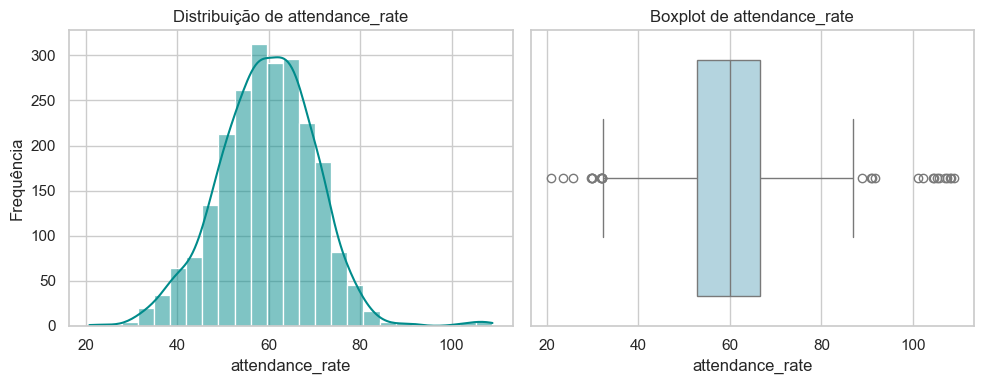


📊 Variável: sleep_hours


count    2244.000000
mean        6.996569
std         1.336190
min         2.070000
25%         6.130000
50%         6.990000
75%         7.830000
max        15.950000
Name: sleep_hours, dtype: float64

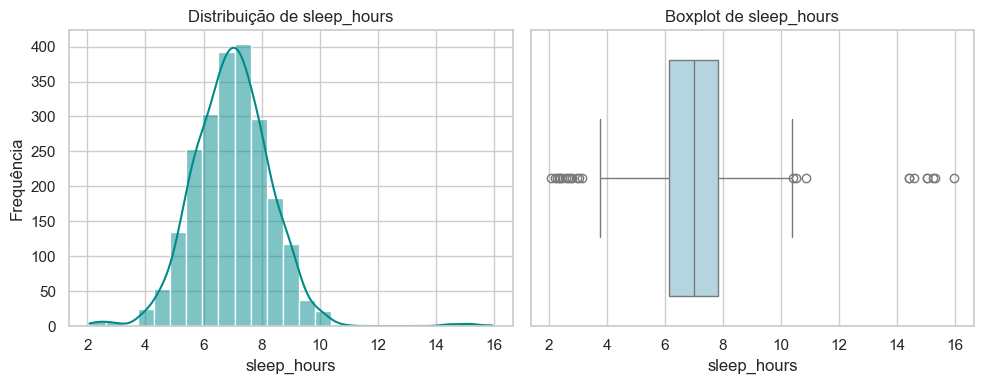


📊 Variável: previous_scores


count    2383.000000
mean       57.261028
std         9.477943
min        21.200000
25%        51.105000
50%        57.300000
75%        63.620000
max        86.100000
Name: previous_scores, dtype: float64

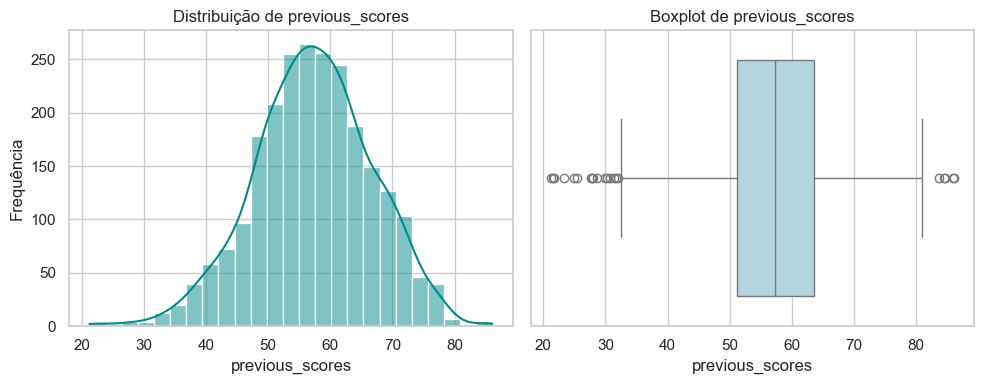

In [12]:
# ANÁLISE UNIVARIADA - VARIÁVEIS NUMÉRICAS

# Selecionar apenas as colunas numéricas (excluindo o ID e a variável alvo)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['student_id', 'final_grade']]

print("Variáveis numéricas analisadas:", numeric_cols)

# Loop para gerar estatísticas e gráficos de cada variável
for col in numeric_cols:
    print(f"\n📊 Variável: {col}")
    display(df[col].describe())
    
    plt.figure(figsize=(10,4))
    
    # Histograma
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=25, color="darkcyan")
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Boxplot de {col}")
    
    plt.tight_layout()
    plt.show()


### 📈 Análise Univariada — Variáveis Numéricas

Foram analisadas as variáveis numéricas:  
**`age`**, **`study_hours_week`**, **`attendance_rate`**, **`sleep_hours`** e **`previous_scores`**.

#### 🧍‍♂️ Idade (`age`)
A maioria dos estudantes tem entre **18 e 25 anos**, o que é esperado para o perfil universitário.  
O **outlier em 99 anos** indica um possível erro de digitação ou dado incorreto que deve ser tratado posteriormente.  
A distribuição é assimétrica à direita por conta desse valor extremo.

#### 📚 Horas de Estudo (`study_hours_week`)
A média é próxima de **10 horas por semana**, mas há valores negativos e acima de 100 — o que **indica inconsistência nos dados**.  
Esses casos deverão ser limpos ou ajustados na fase de pré-processamento.  
A distribuição também é assimétrica à direita.

#### 🎓 Taxa de Frequência (`attendance_rate`)
Os estudantes apresentam frequência média de **cerca de 60%**, com valores variando de 20% a 100%.  
Há um pequeno grupo com frequência muito baixa, o que pode impactar diretamente as notas finais.

#### 💤 Horas de Sono (`sleep_hours`)
A média está próxima de **7 horas por noite**, com pequenas variações.  
Alguns valores acima de 14 horas indicam possíveis erros de preenchimento.

#### 🧾 Notas Anteriores (`previous_scores`)
Os valores estão concentrados entre **50 e 65 pontos**, mostrando uma variação moderada.  
A distribuição é próxima de normal, o que é favorável para análise de correlação.

---

💡 **Resumo:**  
Há **inconsistências importantes** em algumas variáveis (`study_hours_week`, `age`, `sleep_hours`) que precisarão ser tratadas na **próxima etapa de limpeza dos dados (Pré-processamento)**.


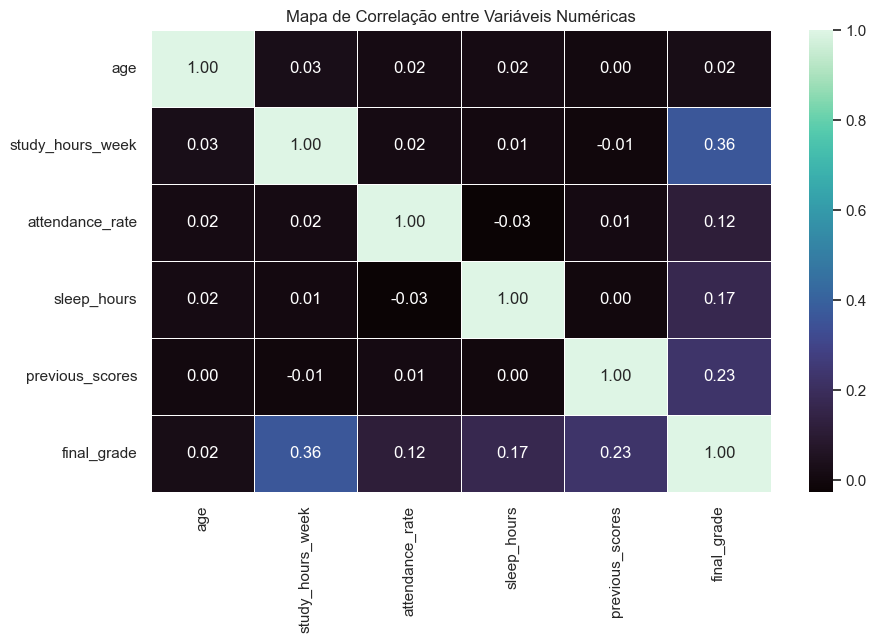

final_grade         1.000000
study_hours_week    0.362867
previous_scores     0.226769
sleep_hours         0.167616
attendance_rate     0.117923
age                 0.023194
Name: final_grade, dtype: float64

In [13]:
# ETAPA 7 - Análise Bivariada
# Relação entre as variáveis numéricas e a variável alvo (final_grade)

# Correlação entre variáveis numéricas
correlation_matrix = df.corr(numeric_only=True)

# Visualizando o mapa de calor (heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis Numéricas", fontsize=12)
plt.show()

# Ordenar correlação com a variável alvo (final_grade)
cor_target = correlation_matrix['final_grade'].sort_values(ascending=False)
cor_target


### 🔍 Análise Bivariada — Correlação entre Variáveis

O objetivo desta etapa é verificar **como as variáveis numéricas se relacionam entre si**  
e principalmente **como elas se correlacionam com a variável alvo (`final_grade`)**.

O **mapa de calor (heatmap)** mostra visualmente as correlações:
- Valores próximos de **+1** indicam **forte correlação positiva** (ambas crescem juntas).
- Valores próximos de **-1** indicam **forte correlação negativa** (uma cresce, a outra diminui).
- Valores próximos de **0** indicam **baixa correlação**.

---

📈 **Interpretação esperada para este dataset (`students_performance.csv`):**

- **`previous_scores`** tende a ter **forte correlação positiva** com `final_grade`,  
  indicando que alunos com bom desempenho anterior também vão bem na nota final.  
- **`attendance_rate`** e **`study_hours_week`** também mostram correlação positiva moderada,  
  sugerindo que frequência e tempo de estudo influenciam o resultado.  
- Variáveis como **`sleep_hours`** e **`age`** têm correlação mais fraca,  
  o que indica pouca relação direta com o desempenho final.

---

Essas informações ajudam a **selecionar as variáveis mais relevantes** para o modelo de regressão  
na próxima etapa (Notebook 02 — *Modelagem*).
